In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations
import image_entropy as ient

In [2]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures'

In [3]:
zbest_file = '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/512/20210503/zbest-0-512-20210503.fits'
zbest_data = fitsio.read(zbest_file)

In [ ]:
ii = (zbest_data['SPECTYPE']=='GALAXY') | (zbest_data['SPECTYPE']=='QSO')
plt.plot(zbest_data['Z'][ii])

In [ ]:
entropy = {}

date = 20211014
expid = 104284

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = ient.compute_camera_entropy(exp_path, date, expid, band)

In [5]:
date = 20211014
expid = 104282

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = ient.compute_camera_entropy(exp_path, date, expid, band)

In [6]:
entropy

{'20211014_00104284_b': array([0.99991568, 0.99997475, 0.9999484 , 0.99997214, 0.99995098,
        0.9998977 , 0.99995964, 0.99996493, 0.99992252, 0.99995034]),
 '20211014_00104284_r': array([0.99989265, 0.99972238, 0.99989247, 0.99992444, 0.9997318 ,
        0.99988667, 0.99951526, 0.99970141, 0.99937702, 0.99993796]),
 '20211014_00104284_z': array([0.99991996, 0.99994039, 0.99993944, 0.99995967, 0.99979976,
        0.99940797, 0.99991394, 0.99986382, 0.99990408, 0.9998574 ]),
 '20211014_00104282_b': array([0.99987996, 0.99993016, 0.99990632, 0.99995345, 0.99992034,
        0.99980415, 0.99990101, 0.99977515, 0.99994202, 0.9999412 ]),
 '20211014_00104282_r': array([0.99992284, 0.99958759, 0.99988556, 0.99991346, 0.99975136,
        0.9998927 , 0.99988248, 0.99954916, 0.99993829, 0.99988776]),
 '20211014_00104282_z': array([0.99992087, 0.99990232, 0.99993618, 0.99989288, 0.99982157,
        0.99970827, 0.99993715, 0.99957377, 0.99991333, 0.99985426])}

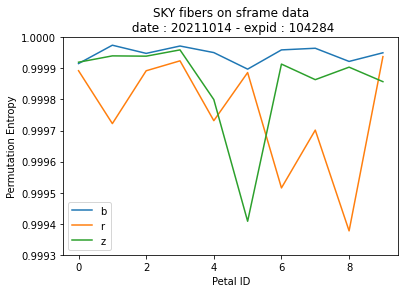

In [7]:
date = 20211014
expid = 104284
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()


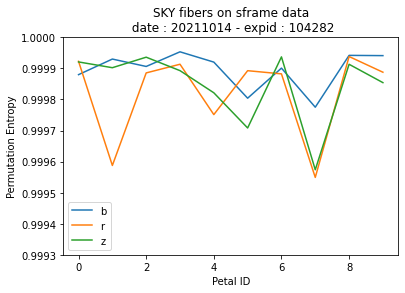

In [8]:
date = 20211014
expid = 104282
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()

In [9]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
date = 20211010
expid = 103670

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = ient.compute_camera_entropy(exp_path, date, expid, band)

NameError: name 'compute_camera_entropy' is not defined

In [ ]:
date = 20211010
expid = 103670
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(ient.entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()

In [ ]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
date = 20211010
expid = 103674

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = compute_camera_entropy(exp_path, date, expid, band)

In [ ]:
date = 20211010
expid = 103674
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()

In [4]:
4000/20

200.0